**Library**

In [0]:
import pandas as pd
import os
import csv
import numpy as np
import matplotlib.pyplot as plt
os.chdir(r"/content/")

**Data Preparation**

In [0]:
# Analyszing the dataset
#1.Shape of the dataset
#2.Missing values of the dataset
#3.Class distribution of target
#Convert dataframe into vectors
df = pd.read_csv('data_banknote_authentication.csv')

def data_preparation(df):
    X = df.drop(columns=['class']).values
    Y = df['class'].values.reshape(-1,1)
    print(df.head(),
      "\n","\n",'Shape of the dataset' + str(df.shape)
      ,"\n","\n",'Missing values in the dataset ' 
      ,"\n",str(df.isnull().sum())
      ,"\n","\n",'Class distribution of target '
      ,"\n",df['class'].value_counts()
      ,"\n","\n",'X shape',df.drop(columns=['class']).shape
      ,"\n","\n",'Y shape',df['class'].shape
      ,"\n","\n",'X vector shape and values'
      ,"\n","\n",X.shape
      ,"\n",X
      ,"\n","\n"'Y vector shape and values'
      ,"\n","\n",Y.shape
      ,"\n",Y)
     
    Data = {'X':X,
            'Y':Y}
    return Data

In [5]:
data = data_preparation(df)

   variance  skewness  kurtosis  entropy  class
0   3.62160    8.6661   -2.8073 -0.44699      0
1   4.54590    8.1674   -2.4586 -1.46210      0
2   3.86600   -2.6383    1.9242  0.10645      0
3   3.45660    9.5228   -4.0112 -3.59440      0
4   0.32924   -4.4552    4.5718 -0.98880      0 
 
 Shape of the dataset(1372, 5) 
 
 Missing values in the dataset  
 variance    0
skewness    0
kurtosis    0
entropy     0
class       0
dtype: int64 
 
 Class distribution of target  
 0    762
1    610
Name: class, dtype: int64 
 
 X shape (1372, 4) 
 
 Y shape (1372,) 
 
 X vector shape and values 
 
 (1372, 4) 
 [[  3.6216    8.6661   -2.8073   -0.44699]
 [  4.5459    8.1674   -2.4586   -1.4621 ]
 [  3.866    -2.6383    1.9242    0.10645]
 ...
 [ -3.7503  -13.4586   17.5932   -2.7771 ]
 [ -3.5637   -8.3827   12.393    -1.2823 ]
 [ -2.5419   -0.65804   2.6842    1.1952 ]] 
 
Y vector shape and values 
 
 (1372, 1) 
 [[0]
 [0]
 [0]
 ...
 [1]
 [1]
 [1]]


**Train & Test dataset**

In [0]:
#diving the dataset into train & test
#Creating a random stratified sample 
#such that proportion of Y remains the
#same in train and test
def train_test_split(X,Y,split):
    N = len(df)
    sample = int(split*N)
    train_idx = np.random.choice(N, sample)
    Xtrain = X[train_idx]
    Ytrain = Y[train_idx]

    test_idx = [idx for idx in range(N) if idx not in train_idx]
    Xtest = X[test_idx]
    Ytest = Y[test_idx]
    
    train_test = {'X_train':Xtrain,
                  'Y_train':Ytrain,
                  'X_test':Xtest,
                  'Y_test':Ytest}
    return train_test

In [7]:
train_test= train_test_split(data['X'],data['Y'],0.7)
y_test = train_test['Y_test']
y_train = train_test['Y_train']
x_train = train_test['X_train']
x_test = train_test['X_test']
print('Distribution in Y train ',
      "\n",np.unique(y_train,return_counts=True)[1]*100/len(y_train),
      "\n",'Distribution in Y test '
      "\n",np.unique(y_test,return_counts=True)[1]*100/len(y_test))

Distribution in Y train  
 [55.72916667 44.27083333] 
 Distribution in Y test 
 [55.57206538 44.42793462]


**Data Standardization**

In [0]:
#Standardizing the data
#X_standard = X - mean(X)/std(X)
#Mean will be 0 and std of 1
#Distribution will be bet(-1,1)

def standardization(X,x_train):
    X = X-np.mean(x_train,axis=0)
    X_standard = X/np.std(x_train,axis=0)
    
    return X_standard

In [9]:
X_train_std = standardization(x_train,x_train)
X_test_std = standardization(x_test,x_train)
print('Mean of standardized train data',
      "\n",X_train_std.mean(),
      "\n",'Std of standardized train data',
      "\n",X_train_std.std(),
      "\n",'Mean of standardized test data',
      "\n",X_test_std.mean(),
      "\n",'Std of standardized test data',
      "\n",X_test_std.std())

Mean of standardized train data 
 8.419191270074103e-17 
 Std of standardized train data 
 1.0000000000000002 
 Mean of standardized test data 
 -0.019220794076425452 
 Std of standardized test data 
 0.9778527600134096


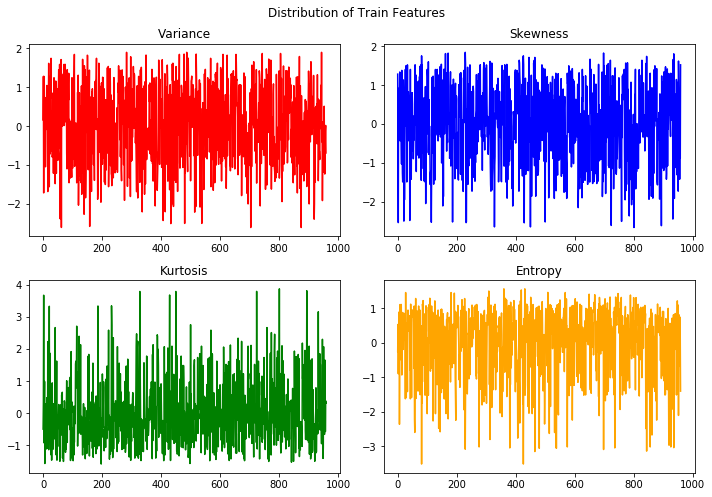

In [10]:
fig, ax = plt.subplots(2, 2, figsize=(10, 7))
ax[0,0].plot(X_train_std[:,0],color='red')
ax[0,0].set_title('Variance')
ax[0,1].plot(X_train_std[:,1],color='blue')
ax[0,1].set_title('Skewness')
ax[1,0].plot(X_train_std[:,2],color='green')
ax[1,0].set_title('Kurtosis')
ax[1,1].plot(X_train_std[:,3],color='orange')
ax[1,1].set_title('Entropy')
fig.suptitle('Distribution of Train Features')
fig.tight_layout(rect=[0,0,1,0.96])

**Data reshaping**

In [0]:
#Reshaping the data into features X columns
#dot product : W.X(Transpose)
#X.reshape = X.Transpose
#Y.reshape = Y.Transpose
def reshape_data(X,Y):
    X =X.T
    Y =Y.reshape(-1,1).T
    return X,Y

In [12]:
x_train_t, y_train_t = reshape_data(X_train_std,y_train)
x_test_t, y_test_t = reshape_data(X_test_std,y_test)
print('Shape of X Train and X test'
     ,"\n",x_train_t.shape,x_test_t.shape
     ,"\n","\n",'Shape of Y train and Y test'
     ,"\n",y_train_t.shape,y_test_t.shape)

Shape of X Train and X test 
 (4, 960) (4, 673) 
 
 Shape of Y train and Y test 
 (1, 960) (1, 673)


# **Logistic Function**
**Following are the steps of creating a logistic function**
###### *Sigmoid Function*
###### *Weight & Bias initialization*
###### *Propogation*
###### *Optimization*
###### *Weight Update*


In [0]:
#Creating a sigmoid function
#Sigmoid  = 1/(1+e^(-z))
def sigmoid(z):
    s=1/(1+np.exp(-z))
    return s

#Parameter (Betas, bias) intialization
def initialize_parameter(dim):
    weight = np.zeros(shape=(dim,1))
    bias = 0
    return weight,bias

In [14]:
weight,bias =initialize_parameter(x_train_t.shape[0])
print('Initialized value of weight and bias for traiing',
     "\n",weight,bias)

Initialized value of weight and bias for traiing 
 [[0.]
 [0.]
 [0.]
 [0.]] 0


In [0]:
#Creating a forward propogation
#Calculating Loss: Average(y*log(p) + (1-y)*log(1-p))
#Caculate gradient for weight &bias

def propagation(weight,bias,X,Y,regularization,lambda_val):
  if regularization ==False:
    #def propagation_without(weight,bias,X,Y):
    #Forward propagation
    A = sigmoid(np.dot(weight.T,X)+bias)
    np.seterr(divide = 'ignore')
    cost = (-1/X.shape[1])*np.sum(Y*np.log(A) + (1-Y)*np.log(1-A)) 
    
    #Backward propagation
    dw = (1/X.shape[1])*np.dot(X,(A-Y).T)
    db = (1/X.shape[1])*np.sum(A-Y)
    print('No regularization is used')
    grad ={'dw':dw,
           'db':db}

    return grad,cost,A
    
  elif regularization == 'L1':
    #def propagation_with_l1:
    #Forward propagation
    A = sigmoid(np.dot(weight.T,X)+bias)
    np.seterr(divide = 'ignore')
    cost = (-1/X.shape[1])*np.sum(Y*np.log(A) + (1-Y)*np.log(1-A)) + (lambda_val/(X.shape[1]))*np.sum(abs(weight))
    
    #Backward propagation
    if weight>0:
      dw = (2/X.shape[1])*np.dot(X,(A-Y).T)+ lambda_val
    else:
      dw = (2/X.shape[1])*np.dot(X,(A-Y).T)- lambda_val

    db = (1/X.shape[1])*np.sum(A-Y)
    print('L1 regularization is used with Lambda value :'+str(lambda_val))
    grad ={'dw':dw,
           'db':db}
    
    return grad,cost,A
  elif regularization == 'L2':
    #def propagation_with_l2:
    #Forward propagation
    A = sigmoid(np.dot(weight.T,X)+bias)
    np.seterr(divide = 'ignore')
    cost = (-1/X.shape[1])*np.sum(Y*np.log(A) + (1-Y)*np.log(1-A)) + (lambda_val/(X.shape[1]))*np.sum(abs(weight))
    
    #Backward propagation
    #dw = (1/X.shape[1])*np.dot(X,(A-Y).T)+ (lambda_val/(2*X.shape[1]))* weight
    dw = (2/X.shape[1])*np.dot(X,(A-Y).T)+ (2*lambda_val/(X.shape[1]))* weight
    db = (1/X.shape[1])*np.sum(A-Y)
    
    grad ={'dw':dw,
           'db':db}
           
    return grad,cost,A
    

In [0]:
#Optimize weight & bias using gradient
#Reach to local minima with learning rate
#update the weights and bais with iteration
def optimization(weight,bias,X,Y,iterations,learning_rate,regularization,lambda_val):
    cost_list =[]
    for i in range(1,iterations):
        
        grad,cost,A = propagation(weight,bias,X,Y,regularization,lambda_val)
        dw = grad['dw']
        db = grad['db']
        weight = weight - learning_rate*dw
        bias = bias - learning_rate*db
        
        # Record the costs
        if i % 100 == 0:
            cost_list.append(cost)
            
        #print('for loop '+str(i),cost)
        #print(weight[0])
        
    # return grad and parameters
    new_parameters = {'new_weight':weight,
                      'new_bias':bias}
    
    new_gradient = {'dw_new':dw,
                    'db_new':db}
    
    return new_parameters,new_gradient,cost_list

**Logisitic Fit Function**

In [0]:
def logistic_function_fit(X,Y,weight,bias,iterations=100,learning_rate=0.05,regularization=False,lambda_val=0.5):
    new_parameters,new_gradient,cost_list = optimization(weight,bias,X,Y,iterations,learning_rate,regularization,lambda_val)
    return new_parameters,cost_list

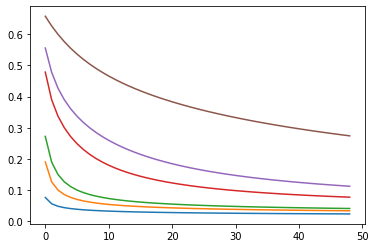

In [18]:
learning_rates=[0.5,0.1,0.05,0.01,0.005,0.001]
for i in learning_rates:
    new_perameters,cost_list = logistic_function_fit(x_train_t,y_train_t,weight,bias,iterations=5000,learning_rate=i,regularization ='L2',lambda_val=0.05)
    plt.plot(np.squeeze(cost_list));


In [0]:
new_perameters,cost_list = logistic_function_fit(x_train_t,y_train_t,weight,bias,iterations=2000,learning_rate=0.5,regularization ='L2',lambda_val=0.05)

**Logistic Prediction Function**

In [0]:
def logistic_function_predict(X,Y,new_parameters,regularization,lambda_val):
    weight = new_parameters['new_weight']
    bias = new_parameters['new_bias']
    grad,cost,A =propagation(weight,bias,X,Y,regularization,lambda_val)
    
    list_pred=np.zeros((1,A.shape[1]))
    for i in range(A.shape[1]):
        if A[0,i] > 0.5:
            list_pred[0,i] =1
        else:
            list_pred[0,i] =0

    print(weight,bias)
    return list_pred

In [25]:
pred=logistic_function_predict(x_test_t,y_test_t,new_perameters,regularization ='L2',lambda_val=0.05)
print(pred)

[[-7.08101551]
 [-7.0721679 ]
 [-6.37972479]
 [ 0.35842437]] -2.8073911738620243
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

**Accuracy**

In [26]:
print("test accuracy: {} %".format(100 - np.mean(np.abs(pred - y_test_t)) * 100))

test accuracy: 98.06835066864785 %
